# SHOWZ EVENTS / SERVER REGISTRATION
enero, 2017 hasta diciembre 2018
Analisis para optimizacion y enfoque de gastos asignados a marketing.

## ETAPA 1. Recepcion y revision de archivos.
- Verificaciones de valores nulos o duplicados.
- Verificacion si es necesario convertir tipos de datos de columnas.

In [1]:
import pandas as pd

visits = pd.read_csv('/datasets/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [2]:
#Conversion de columnas de fecha (estan object).
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

print(visits.duplicated().sum())
visits.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [3]:
import pandas as pd

orders = pd.read_csv('/datasets/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
#Conversion de columna de fecha (dtype=objetc).
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [5]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [6]:
#Convertir el nombre y el tipo de la de datos de la columna dt a date.
costs['dt'] = pd.to_datetime(costs['dt'])
costs = costs.rename(columns={'dt': 'date'})

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


En esta primera etapa hemos trabajado en la preparacion y optimizacion de los datos para el analisis del proyecto. Las principales actividades realizadas fueron:
1. Importacion de los datos.
2. Optimizacion de los tipos de datos.
   - Convertimos a tipo datetime las columnas de fechas que estaban en tipo objetc para asegurar los calculos temporales correctos.
   - Confirmamos que el identificador de usuario (Uid) se mantenga en su tipo en todas las bases de datos y que no requiera conversion dado que no perjudicara al analisis.
4. Verificacion de duplicados y valores ausentes.
5. Limpieza y estandarizacion para unificar los criterios de nombres (dt a date) y mejorar la legibilidad del analisis.
Con esto la base de datos queda limpia, consistente y con formatos correctos para iniciar la fase de analisis.

# Etapa 2: Informes y Metricas
- Trafico de plataforma

In [7]:

#Columnas auxiliares para agrupar por fechas
visits['session_date'] = pd.to_datetime(visits['Start Ts'].dt.date)
visits['session_year'] = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week.astype(int)

#Calculo de la duracion de la sesion en segundos
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

#DAU, WAU, MAU

dau = (visits.groupby(['session_date']).agg({'Uid': 'nunique'}).rename(columns={'Uid': 'DAU'}).reset_index())

wau = (visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).rename(columns={'Uid': 'WAU'}).reset_index())

#wau['week_start'] = pd.to_datetime(wau['session_year'].astype(str) + '-W' + wau['session_week'].astype(str) + '-1', format='%G-W%V-%u')

mau = (visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).rename(columns={'Uid': 'MAU'}).reset_index())

#mau['month_start'] = pd.to_datetime(mau['session_year'].astype(str) + '-' + mau['session_month'].astype(str) + '-01')

metrics_summary = pd.DataFrame({
    'DAU_promedio': [dau['DAU'].mean()],
    'WAU_promedio': [wau['WAU'].mean()],
    'MAU_promedio': [mau['MAU'].mean()]})

print(visits['session_duration_sec'])
print("Resumen de metricas de uso:")
print(metrics_summary.round(2))

0         1080.0
1         1680.0
2            0.0
3         1440.0
4            0.0
           ...  
359395      19.0
359396      19.0
359397      19.0
359398      19.0
359399      19.0
Name: session_duration_sec, Length: 359400, dtype: float64
Resumen de metricas de uso:
   DAU_promedio  WAU_promedio  MAU_promedio
0        907.99       5716.25      23228.42


Hasta aqui hemos obtenido una columna de registro de la duracion de las sesiones por segundo y el resumen del promedio de las sesiones totales que se realizan en la aplicacion de forma diaria (DAU), semanal (WAU) y Mensual (MAU). 
A continuacion se presenta el analisis de la intensidad de las sesiones por usuario al dia y por mes para que en base a estos datos se pueda hacer una extrapolacion y tener un mejor pantallazo del movimiento de la empresa y el comportamiento de los usuarios.

In [8]:
# Sesiones por dia
sessions_per_day = (visits.groupby('session_date').agg(n_sessions=('Uid', 'count')).reset_index())
print("Sesiones por dia (primeras filas):")
print(sessions_per_day.head())

#Sesiones por mes y usuarios unicos
sessions_per_user = (visits.groupby(['session_year', 'session_month']).agg(n_sessions=('Uid', 'count'), n_users=('Uid', 'nunique')).reset_index())

#Sesiones promedio por usuario
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

print("Sesiones promedio por usuario al mes:")
print(sessions_per_user.head())

Sesiones por dia (primeras filas):
  session_date  n_sessions
0   2017-06-01         664
1   2017-06-02         658
2   2017-06-03         477
3   2017-06-04         510
4   2017-06-05         893
Sesiones promedio por usuario al mes:
   session_year  session_month  n_sessions  n_users  sess_per_user
0          2017              6       16505    13259       1.244815
1          2017              7       17828    14183       1.256998
2          2017              8       14355    11631       1.234202
3          2017              9       23907    18975       1.259921
4          2017             10       37903    29692       1.276539


In [9]:
#Duracion de las sesiones
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

print("Duracion promedio de sesiones (segundos):")
print(visits['session_duration_sec'].mean())

Duracion promedio de sesiones (segundos):
643.0256872565387


In [10]:
# Retorno de los usuarios - Tiempo entre sesiones
visits_sorted = visits.sort_values(by=['Uid', 'Start Ts'])
visits_sorted['days_since_last_visit'] = (visits_sorted.groupby('Uid')['Start Ts'].diff().dt.days)
print("Primeras filas con dias desde la ultima visita:")
print(visits_sorted.head())

Primeras filas con dias desde la ultima visita:
         Device              End Ts  Source Id            Start Ts  \
196543    touch 2018-03-01 17:33:00          3 2018-03-01 17:27:00   
257333    touch 2018-02-06 15:57:00          2 2018-02-06 15:55:00   
173818  desktop 2017-06-07 18:48:00          3 2017-06-07 18:47:00   
173142  desktop 2017-09-18 23:07:00          2 2017-09-18 22:49:00   
192554  desktop 2018-02-18 15:26:00          2 2018-02-18 15:17:00   

                    Uid session_date  session_year  session_month  \
196543   11863502262781   2018-03-01          2018              3   
257333   49537067089222   2018-02-06          2018              2   
173818  297729379853735   2017-06-07          2017              6   
173142  313578113262317   2017-09-18          2017              9   
192554  313578113262317   2018-02-18          2018              2   

        session_week  session_duration_sec  days_since_last_visit  
196543             9                 360.0      

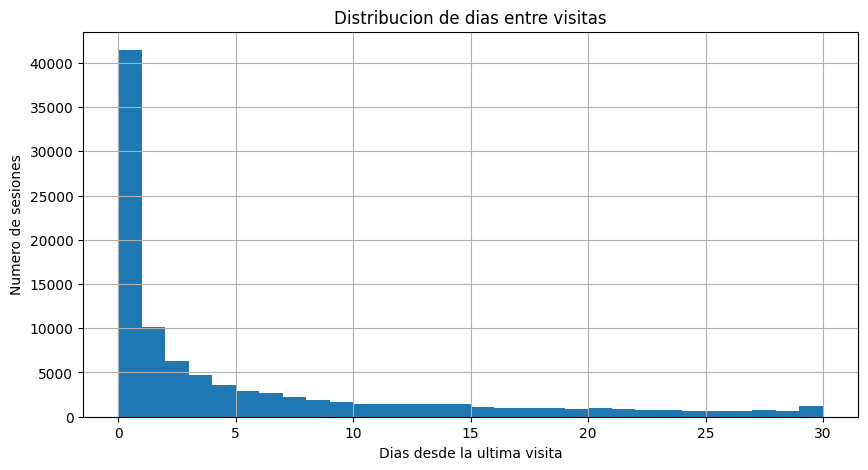

In [11]:
#Distribucion de dias de retorno.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
visits_sorted['days_since_last_visit'].hist(bins=30, range=(0, 30))
plt.title('Distribucion de dias entre visitas')
plt.xlabel('Dias desde la ultima visita')
plt.ylabel('Numero de sesiones')
plt.grid(True)
plt.show()

In [12]:
#Retorno promedio por fuente de trafico
return_by_source = (visits_sorted.groupby('Source Id')['days_since_last_visit'].mean().reset_index().sort_values(by='days_since_last_visit'))

print("Retorno promedio de usuarios por fuente de trafico:")
print(return_by_source)

Retorno promedio de usuarios por fuente de trafico:
   Source Id  days_since_last_visit
0          1               8.939275
1          2              18.354282
6          7              18.500000
5          6              22.250000
8         10              24.696989
4          5              26.074825
3          4              37.415818
7          9              45.498462
2          3              46.700985


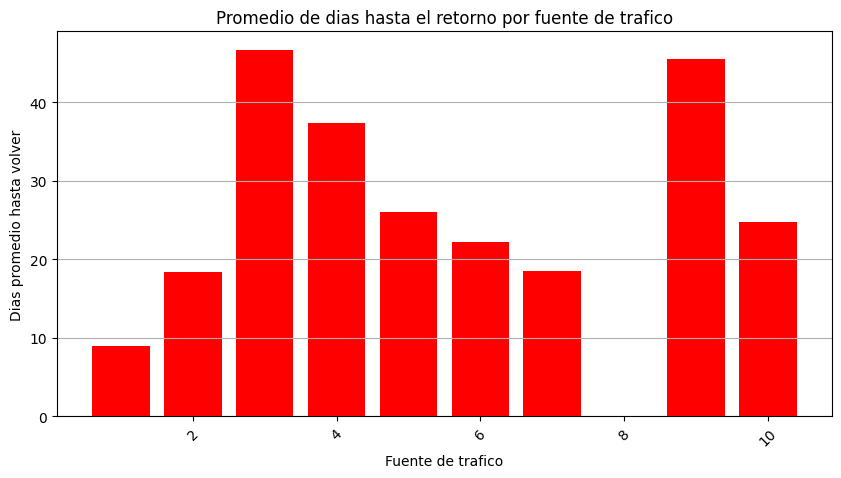

In [13]:
#Efectividad de canales
plt.figure(figsize=(10, 5))
plt.bar(return_by_source['Source Id'], return_by_source['days_since_last_visit'], color='red')
plt.title('Promedio de dias hasta el retorno por fuente de trafico')
plt.xlabel('Fuente de trafico')
plt.ylabel('Dias promedio hasta volver')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

En cuanto a la base de datos de visitas se puede observar que en promedio para esta muestra hay 907 usuarios diarios, 5.716 usuarios mensuales y 23.228 usuarios anuales con una duracion promedio de 650 segundos por sesion, es decir 10 minutos. La frecuencia de usuario no es estable ya que la gran mayoria de los usuarios no realiza otro ingreso, menos del 10%, sin embargo las fuentes de trafico con mayor efectividad son la "3" y la "9" lo cual las identifica con mas atractivas para la concentracion de inversion para mejorar la retencion. 

## Ventas

In [14]:
#Cambio de nombres de las columnas - Normalizacion de nombre de usuario
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

orders['order_date'] = pd.to_datetime(orders['Buy Ts'])
if 'revenue' not in orders.columns and 'Revenue' in orders.columns:
    orders = orders.rename(columns={'Revenue': 'revenue'})
if 'uid' not in orders.columns and 'Uid' in orders.columns:
    orders = orders.rename(columns={'Uid': 'uid'})
if 'uid' not in visits.columns and 'Uid' in visits.columns:
    visits = visits.rename(columns={'Uid': 'uid'})

#Mes de pedido para cortes mensuales
orders['order_month'] = orders['order_date'].astype('datetime64[M]')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Buy Ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   order_date   50415 non-null  datetime64[ns]
 4   order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 1.9 MB


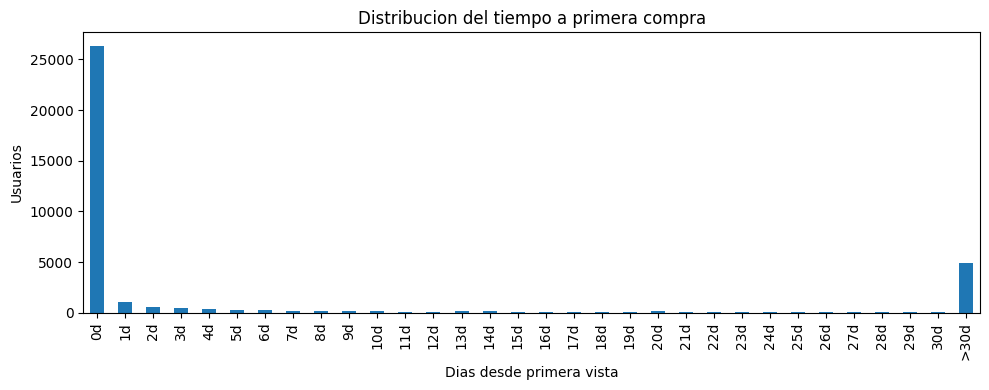

In [15]:
#Periodo de tiempo entre registro y primera compra. Cuanto tardan los usuarios entre registrarse y hacer su compra.
first_seen = visits.groupby('uid')['Start Ts'].min().rename('first_seen')

#primera compra
first_order = orders.groupby('uid')['order_date'].min().rename('first_order')

conv_lag = pd.concat([first_seen, first_order], axis=1).dropna()
conv_lag['lag_days'] = (conv_lag['first_order'] - conv_lag['first_seen']).dt.days

bins = list(range(-1, 31)) + [9999]
labels = [f"{d}d" for d in range(0, 31)] + [">30d"]
conv_lag['lag_bucket'] = pd.cut(conv_lag['lag_days'], bins=bins, labels=labels, right=True)

#Distribucion para comparaciones
lag_dist = conv_lag['lag_bucket'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
lag_dist.plot(kind='bar')
plt.title('Distribucion del tiempo a primera compra')
plt.xlabel('Dias desde primera vista'); plt.ylabel('Usuarios')
plt.tight_layout(); plt.show()

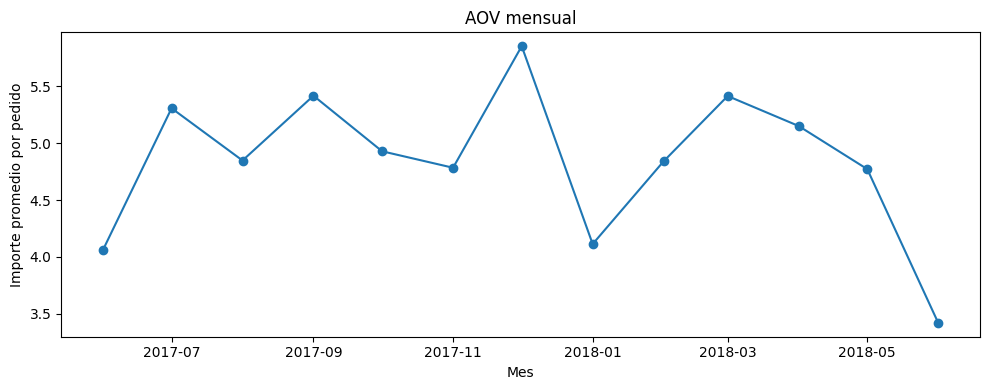

In [16]:
# Promedio mensual del importe de compra (AOV)

aov_monthly = orders.groupby('order_month').apply(lambda df: df['revenue'].sum() / df['uid'].count()).rename('AOV').reset_index()

plt.figure(figsize=(10,4))
plt.plot(aov_monthly['order_month'], aov_monthly['AOV'], marker='o')
plt.title('AOV mensual')
plt.xlabel('Mes'); plt.ylabel('Importe promedio por pedido')
plt.tight_layout(); plt.show()

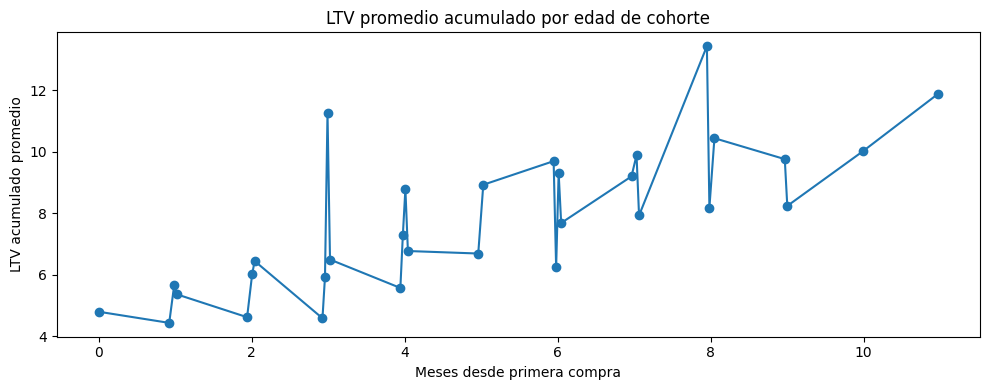

In [17]:
#LTV - Cohorte de primera compra

#Cohorte de primera compra
first_order_month = orders.groupby('uid')['order_month'].min().rename('first_order_month')
orders_cohort = orders.merge(first_order_month, on='uid')

#Edad de cohortes establecida en meses
orders_cohort['cohort_age'] = ((orders_cohort['order_month'] - orders_cohort['first_order_month']) / np.timedelta64(1, 'M'))

#Tamaño inicial de cada cohorte
cohort_sizes = first_order_month.value_counts().rename_axis('first_order_month').reset_index(name='cohort_size')

#Ingresos por cohorte y edad
cohort_revenue = orders_cohort.groupby(['first_order_month', 'cohort_age'])['revenue'].sum().reset_index()

#LTV por cohorte y edad

cohort_ltv = cohort_revenue.merge(cohort_sizes, on='first_order_month', how='left')
cohort_ltv['ltv'] = cohort_ltv['revenue'] / cohort_ltv['cohort_size']


#Pivot de LTV (no acumulado)
ltv_pivot = cohort_ltv.pivot_table(index='first_order_month',columns='cohort_age', values='ltv', aggfunc='mean').round(2)

#Curva promedio acumulada 
ltv_cum_avg = ltv_pivot.cumsum(axis=1).mean(axis=0)


plt.figure(figsize=(10,4))
plt.plot(ltv_cum_avg.index, ltv_cum_avg.values, marker='o')
plt.title('LTV promedio acumulado por edad de cohorte')
plt.xlabel('Meses desde primera compra'); plt.ylabel('LTV acumulado promedio')
plt.tight_layout(); plt.show()


Podemos observar que los usuarios hacen sus compras casi de inmediato, la mayoria hace su adquisision el mismo dia del registro y el resto cae rapidamente a medida que pasan los dias, lo que indica una conversion inicial muy fuerte. El numero de pedidos por periodo muestra un flujo muy estable con lijeros picos en fechas clave y el AOV se mantiene en torno a los 4.5, con maximos en diciembre y minimos en mitades del año. 
Por ultimo, el LTV acumulado confirma que el valor que aporta cada cliente crece de forma sostenida con el tiempo, permitiendo evaluar el retorno potencial de campañas segun la velocidad de conversion y el gasto medio.

## Marketing

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#Gasto total y por fuente
cost_by_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
print("\n=== Gasto total por fuente de adquisicion ===")
print(cost_by_source)

costs['month'] = costs['date'].dt.to_period('M')

#Gasto mensual total
costs_by_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()


=== Gasto total por fuente de adquisicion ===
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


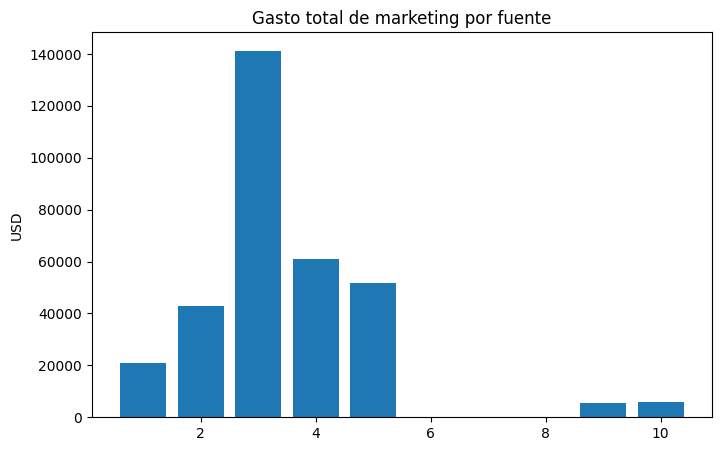

In [19]:
# Grafico: Gasto total por fuentes
plt.figure(figsize=(8,5))
plt.bar(cost_by_source['source_id'],cost_by_source['costs'])
plt.title('Gasto total de marketing por fuente')
plt.ylabel('USD')
plt.show()

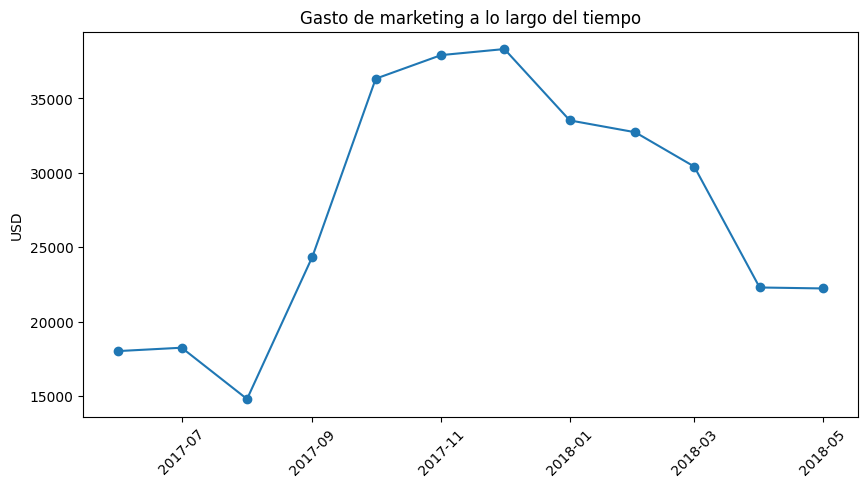

In [20]:
# Grafico: gasto total mensual
plt.figure(figsize=(10,5))

plt.plot(costs_by_month['month'].dt.to_timestamp(), costs_by_month['costs'], marker='o')
plt.title('Gasto de marketing a lo largo del tiempo')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.show()

Interpretaciones. 
- La figura de barras nos muestra los gastos realizados por la compañia en marketing por fuentes donde podemos observar que la inversion mayor esta en Source 3, es importante que revisemos el return de todas para observar la respuestas de los usuarios.
- En el caso grafico lineal se muestra el comportamiento variable por mes de la empresa en su derivacion de gastos en marketing, seria interesante saber el origen de dichas decisiones ya que son evidentes picos de meses, tantos en gastos altos como bajos.

In [21]:

#Numero de clientes nuevos por fuente.
new_users_by_source = visits.groupby('Source Id', dropna=False)['uid'].nunique().reset_index()
new_users_by_source.columns = ['source_id', 'new_users']

#CAC por fuente
cac_by_source = pd.merge(cost_by_source, new_users_by_source, on='source_id', how='inner')

cac_by_source['CAC'] = cac_by_source['costs'] / cac_by_source['new_users']

print("\n=== Usuarios (unicos) por fuente ===")
print(new_users_by_source)
print("\n=== CAC por fuente de adquisicion ===")
print(cac_by_source)


=== Usuarios (unicos) por fuente ===
   source_id  new_users
0          1      18999
1          2      26245
2          3      74756
3          4      83525
4          5      56974
5          6          6
6          7         34
7          9       9264
8         10       8067

=== CAC por fuente de adquisicion ===
   source_id      costs  new_users       CAC
0          1   20833.27      18999  1.096546
1          2   42806.04      26245  1.631017
2          3  141321.63      74756  1.890439
3          4   61073.60      83525  0.731201
4          5   51757.10      56974  0.908434
5          9    5517.49       9264  0.595584
6         10    5822.49       8067  0.721766


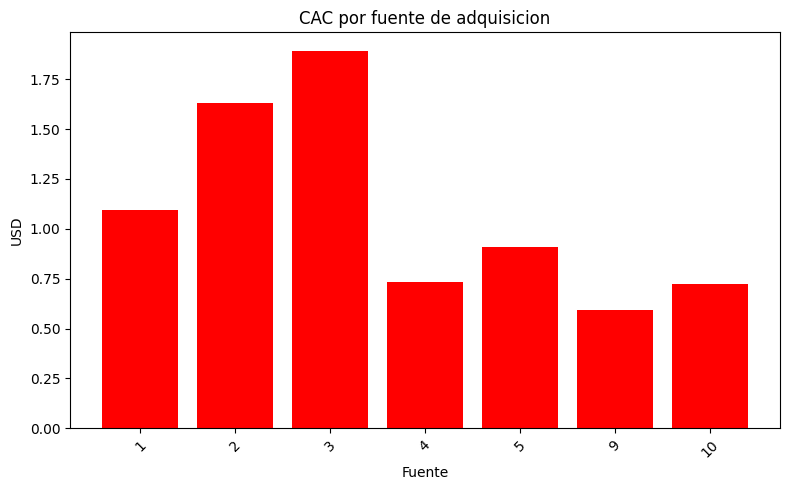

In [22]:
# Grafico: CAC por fuente
plt.figure(figsize=(8, 5))
plt.bar(cac_by_source['source_id'].astype(str), cac_by_source['CAC'], color='red')
plt.title('CAC por fuente de adquisicion')
plt.ylabel('USD')
plt.xlabel('Fuente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui presentamos la CAC por fuente que es el costo que destina la empresa a cada fuente para captar usuarios. A continuacion tendremos la respuesta de los usuarios logrados para saber si amerita o no este gasto en las fuentes especificas.

In [23]:
#Fecha e importe
orders['order_date'] = pd.to_datetime(orders['order_date'])
if 'revenue' not in orders.columns:
    money_col = 'price' if 'price' in order.columns else ('amount' if 'amount' in orders.columns else None)
    if money_col:
        orders = orders.rename(columns={money_col: 'revenue'})
    else:
        raise KeyError("No encuentro columna de importe en orders (espera 'revenue', 'price' o 'amount').")
#1) Mapear fuente de adquisicion de usuario
visits_sorted = visits.sort_values(['uid', 'Start Ts'])
first_touch = visits_sorted.drop_duplicates(subset='uid', keep='first')[['uid', 'Source Id']].copy()
first_touch = first_touch.rename(columns={'Source Id': 'source_id'})

print("\n=== Mapeo usuario - fuente (first touch) (primeras filas ===")
print(first_touch.head())


=== Mapeo usuario - fuente (first touch) (primeras filas ===
                    uid  source_id
196543   11863502262781          3
257333   49537067089222          2
173818  297729379853735          3
173142  313578113262317          2
34588   325320750514679          5


In [24]:
#2) Atribuir fuente a cada orden
orders_with_source = orders.merge(first_touch, on='uid', how='left')

#3) Usuarios adquiridos por fuente
users_by_source = first_touch.groupby('source_id')['uid'].nunique().reset_index()
users_by_source.columns = ['source_id', 'n_users']

print("\n=== Usuarios adquiridos por fuente ===")
print(users_by_source)

#4) Ingresos por fuente (sumatoria total de las adquisiciones de usuarios)
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index()

print("\n=== Ingresos (revenue) por fuente ===")
print(revenue_by_source)


=== Usuarios adquiridos por fuente ===
   source_id  n_users
0          1     9469
1          2    17616
2          3    66116
3          4    72346
4          5    49237
5          6        2
6          7       32
7          9     6448
8         10     6903

=== Ingresos (revenue) por fuente ===
   source_id   revenue
0          1  31090.55
1          2  46923.61
2          3  54511.24
3          4  56696.83
4          5  52624.02
5          7      1.22
6          9   5759.40
7         10   4450.33


In [25]:
#5) LTV por fuente = ingresos totales atribuibles / usuarios de esa fuente
ltv_by_source = revenue_by_source.merge(users_by_source, on='source_id', how='inner')
ltv_by_source['LTV'] = ltv_by_source['revenue'] / ltv_by_source['n_users']

print("\n=== LTV por fuente ===")
print(ltv_by_source[['source_id', 'LTV']])


=== LTV por fuente ===
   source_id       LTV
0          1  3.283404
1          2  2.663693
2          3  0.824479
3          4  0.783690
4          5  1.068790
5          7  0.038125
6          9  0.893207
7         10  0.644695


In [26]:
# ROMI por fuente (LTV / CAC)
romi_by_source = pd.merge(cac_by_source, ltv_by_source[['source_id', 'LTV']], on='source_id', how='inner')
romi_by_source['ROMI'] = romi_by_source['LTV'] / romi_by_source['CAC']

print("\n=== ROMI por fuente ===")
print(romi_by_source[['source_id', 'CAC', 'LTV', 'ROMI']])


=== ROMI por fuente ===
   source_id       CAC       LTV      ROMI
0          1  1.096546  3.283404  2.994316
1          2  1.631017  2.663693  1.633148
2          3  1.890439  0.824479  0.436131
3          4  0.731201  0.783690  1.071784
4          5  0.908434  1.068790  1.176520
5          9  0.595584  0.893207  1.499717
6         10  0.721766  0.644695  0.893218


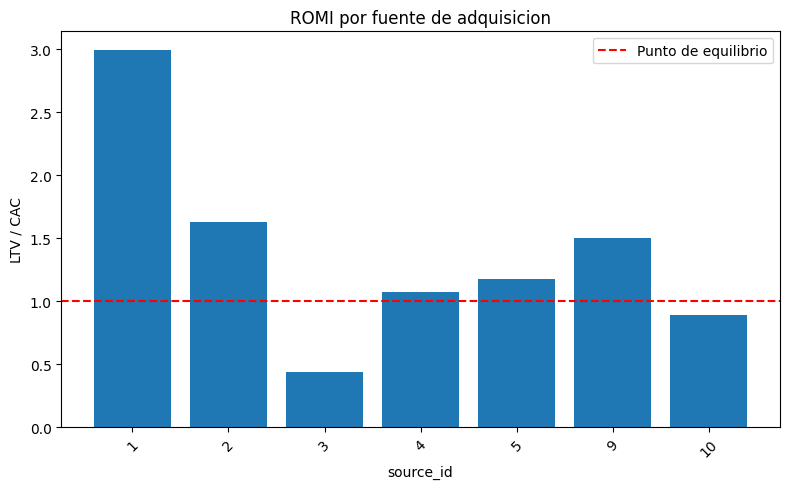

In [27]:
# Grafico ROMI
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(romi_by_source['source_id'].astype(str), romi_by_source['ROMI'],)
plt.title('ROMI por fuente de adquisicion')
plt.xlabel('source_id')
plt.ylabel('LTV / CAC')
plt.axhline(y=1, color='red', linestyle='--', label='Punto de equilibrio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CONCLUSIONES
El analisis se llevo a cabo basandonos en las metricas CAC (lo que les cuesta captar un usuario), LTV (lo que genera cada usuario) y el ROMI o retorno sobre marketing que nos dice si vale la pena la inversion y me termine enfocando presisamente en la metrica ROMI por que conecta directo la inversion con el retorno, enfocandome en optimizar el gasto en marketing. Un factor importante es que un CAC bajo como el de source 10 no garantiza la rentabilidad ya que tiene un LTV muy debil, y es asi como la combinacion de CAC con LTV = ROMI creo que es determinante para encaminar correctamento las inversiones en marketing.

La fuente mas recomendable segun el analisis es la Source 1 con un ROMI de 2.99 (1 dolar de inversion genera casi 3 veces en retorno, asi que es conveniente priorizar la inversion aqui). Tanto Source 2 (1.63) y Source 9 (1.49) tienen un retorno positivo y solido, parecen favorables y con tendencia a mejoria. Las fuentes NO rentables con ROMI < 1 son Source 10 (0.89) y Source 3 (0.43) es mejor descartarlar o un ajuste inmediato.

Para finalizar, recomiendo invertir en las source 1, 2 y 9, tener cautela y alerta en las source 4 y 5 y reducir o eliminar inversiones en source 3 y 10. De esta manera maximizamos el retorno y se evita desperdiciar presupuestos.